## Work
1. 試比較有 BN 在 Batch_size = 2, 16, 32, 128, 256 下的差異
2. 請嘗試將 BN 放在 Activation 之前，並比較訓練結果
3. 請於 BN 放在 Input Layer 後，並比較結果

In [1]:
import os
import keras
import itertools
# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
from keras.layers import BatchNormalization
"""
建立神經網路，並加入 BN layer
"""
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(input_layer)
            x = BatchNormalization()(x)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(x)
            x = BatchNormalization()(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [6]:
"""Code Here
設定超參數
"""
## 超參數設定
LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE = [16, 32,128, 256]
MOMENTUM = 0.95

In [7]:
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
lr = LEARNING_RATE 
for batch_sel in BATCH_SIZE:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with BatchSize = %d" % (batch_sel))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    
    optimizer = keras.optimizers.Adam(lr=lr)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)
    
    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=batch_sel, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
     # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["accuracy"]
    valid_acc = model.history.history["val_accuracy"]
    
    exp_name_tag = "exp-batchsize-%d" % (batch_sel)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

Experiment with BatchSize = 16
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
batch_normalization_1 (Batch (None, 512)               2048      
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
batch_normalization_2 (Batch (None, 256)               1024      
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
batch_normalization_3 (Batch

50000/50000 [==============================] - 96s 2ms/step - loss: 1.1553 - accuracy: 0.5902 - val_loss: 1.3759 - val_accuracy: 0.5389
Epoch 47/50
50000/50000 [==============================] - 96s 2ms/step - loss: 1.1564 - accuracy: 0.5919 - val_loss: 1.4054 - val_accuracy: 0.5297
Epoch 48/50
50000/50000 [==============================] - 96s 2ms/step - loss: 1.1461 - accuracy: 0.5921 - val_loss: 1.4382 - val_accuracy: 0.5308
Epoch 49/50
50000/50000 [==============================] - 95s 2ms/step - loss: 1.1445 - accuracy: 0.5926 - val_loss: 1.4427 - val_accuracy: 0.5203
Epoch 50/50
50000/50000 [==============================] - 95s 2ms/step - loss: 1.1427 - accuracy: 0.5963 - val_loss: 1.4205 - val_accuracy: 0.5161
Experiment with BatchSize = 32
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
__________________________

50000/50000 [==============================] - 56s 1ms/step - loss: 0.9228 - accuracy: 0.6700 - val_loss: 1.4478 - val_accuracy: 0.5194
Epoch 42/50
50000/50000 [==============================] - 54s 1ms/step - loss: 0.9144 - accuracy: 0.6746 - val_loss: 1.5429 - val_accuracy: 0.4825
Epoch 43/50
50000/50000 [==============================] - 54s 1ms/step - loss: 0.9090 - accuracy: 0.6745 - val_loss: 1.5567 - val_accuracy: 0.4993
Epoch 44/50
50000/50000 [==============================] - 56s 1ms/step - loss: 0.9042 - accuracy: 0.6787 - val_loss: 1.4412 - val_accuracy: 0.5207
Epoch 45/50
50000/50000 [==============================] - 55s 1ms/step - loss: 0.8944 - accuracy: 0.6791 - val_loss: 1.5295 - val_accuracy: 0.5047
Epoch 46/50
50000/50000 [==============================] - 53s 1ms/step - loss: 0.8894 - accuracy: 0.6826 - val_loss: 1.5597 - val_accuracy: 0.5016
Epoch 47/50
50000/50000 [==============================] - 56s 1ms/step - loss: 0.8880 - accuracy: 0.6815 - val_loss: 1.4499

50000/50000 [==============================] - 21s 423us/step - loss: 0.5139 - accuracy: 0.8164 - val_loss: 2.1555 - val_accuracy: 0.4776
Epoch 36/50
50000/50000 [==============================] - 20s 399us/step - loss: 0.4910 - accuracy: 0.8254 - val_loss: 2.1598 - val_accuracy: 0.4694
Epoch 37/50
50000/50000 [==============================] - 18s 351us/step - loss: 0.4867 - accuracy: 0.8253 - val_loss: 2.2688 - val_accuracy: 0.4610
Epoch 38/50
50000/50000 [==============================] - 18s 361us/step - loss: 0.4756 - accuracy: 0.8285 - val_loss: 2.2829 - val_accuracy: 0.4791
Epoch 39/50
50000/50000 [==============================] - 17s 344us/step - loss: 0.4687 - accuracy: 0.8313 - val_loss: 2.2635 - val_accuracy: 0.4759
Epoch 40/50
50000/50000 [==============================] - 17s 343us/step - loss: 0.4501 - accuracy: 0.8377 - val_loss: 2.0954 - val_accuracy: 0.4981
Epoch 41/50
50000/50000 [==============================] - 17s 342us/step - loss: 0.4417 - accuracy: 0.8414 - va

50000/50000 [==============================] - 11s 228us/step - loss: 0.5176 - accuracy: 0.8160 - val_loss: 2.0118 - val_accuracy: 0.4720
Epoch 30/50
50000/50000 [==============================] - 11s 225us/step - loss: 0.4951 - accuracy: 0.8235 - val_loss: 2.1767 - val_accuracy: 0.4467
Epoch 31/50
50000/50000 [==============================] - 11s 220us/step - loss: 0.4702 - accuracy: 0.8336 - val_loss: 2.2007 - val_accuracy: 0.4703
Epoch 32/50
50000/50000 [==============================] - 11s 218us/step - loss: 0.4524 - accuracy: 0.8408 - val_loss: 2.2607 - val_accuracy: 0.4579
Epoch 33/50
50000/50000 [==============================] - 11s 223us/step - loss: 0.4414 - accuracy: 0.8415 - val_loss: 2.1760 - val_accuracy: 0.4764
Epoch 34/50
50000/50000 [==============================] - 11s 217us/step - loss: 0.4210 - accuracy: 0.8514 - val_loss: 2.1031 - val_accuracy: 0.4889
Epoch 35/50
50000/50000 [==============================] - 11s 219us/step - loss: 0.4011 - accuracy: 0.8585 - va

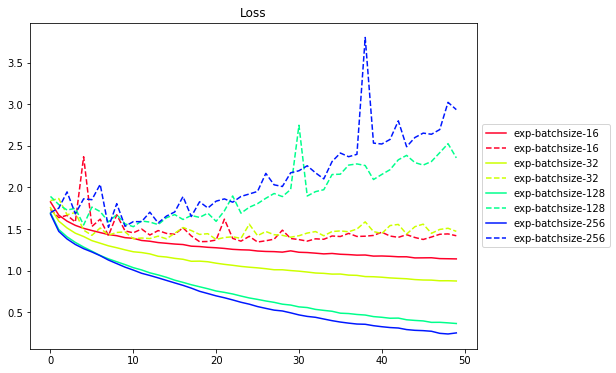

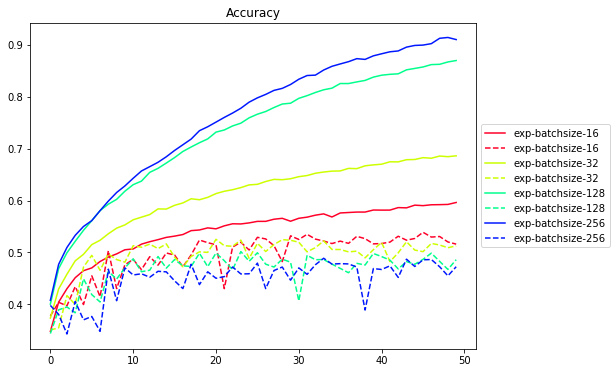

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""
NUM_COLORS = len(results.keys())
cm = plt.get_cmap('gist_rainbow')
color_bar = [cm(1.*i/NUM_COLORS) for i in range(NUM_COLORS)]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()